In [1]:
from gsmmutils.experimental.exp_matrix import ExpMatrix
from gsmmutils.experimental.biomass import Biomass
from gsmmutils.stats.stats import StatisticalAnalysis
from gsmmutils import DATA_PATH
import pandas as pd
from gsmmutils.graphics.plot import boxplot, hist, qqplot
from pprint import pprint

In [2]:
DATA_PATH = "../data"
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)

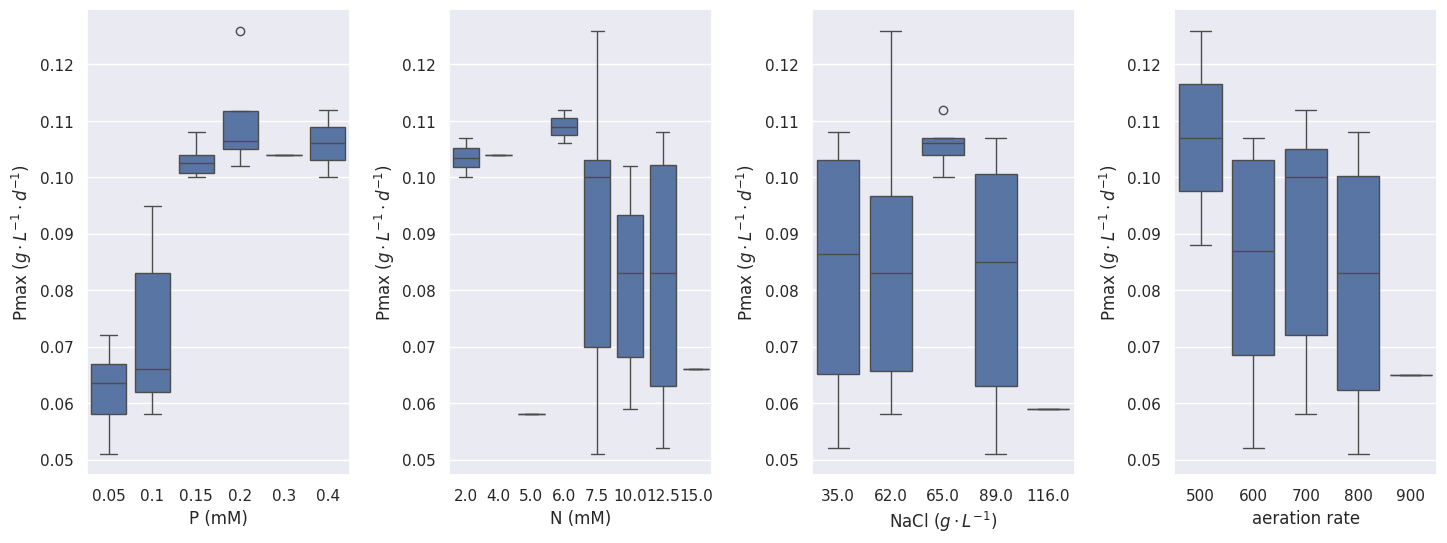

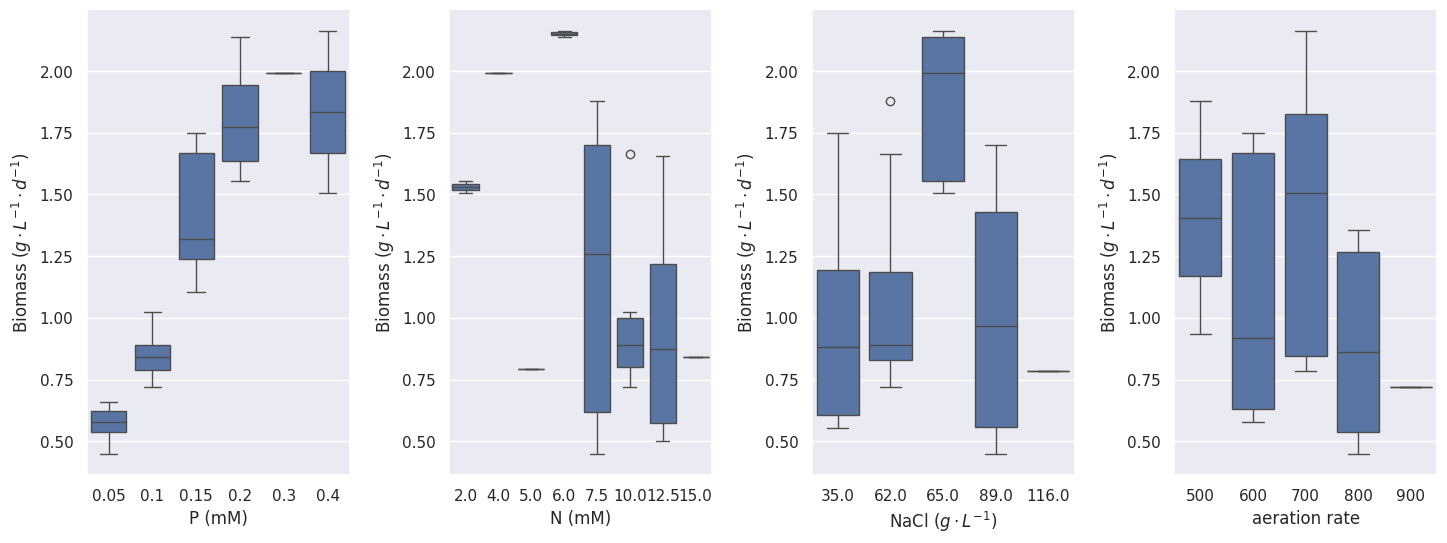

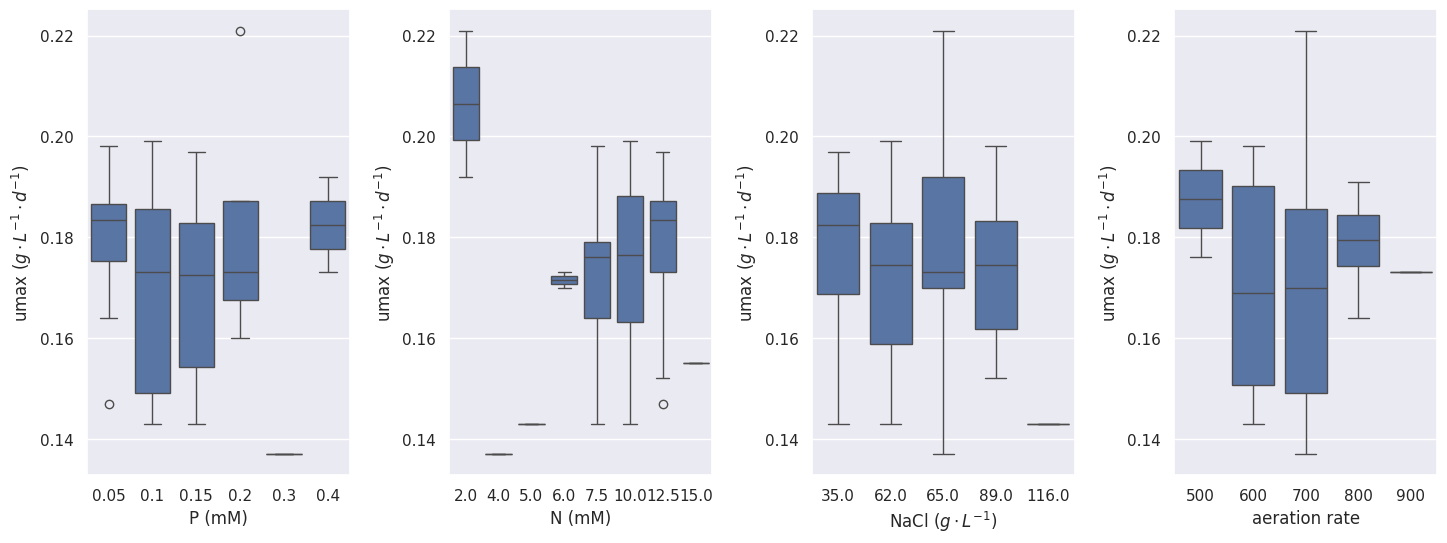

In [3]:
matrix.conditions = matrix.conditions.loc[(~matrix.conditions.index.str.startswith("Xi"))
& (~matrix.conditions.index.str.startswith("Yimei")) & (~matrix.conditions.index.str.startswith("fachet"))]
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Pmax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
                        , y_labels={'Pmax': 'Pmax $(g \cdot L^{-1} \cdot d^{-1})$'})
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['biomass'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'biomass': 'Biomass $(g \cdot L^{-1} \cdot d^{-1})$'})
boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['umax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'umax': 'umax $(g \cdot L^{-1} \cdot d^{-1})$'})

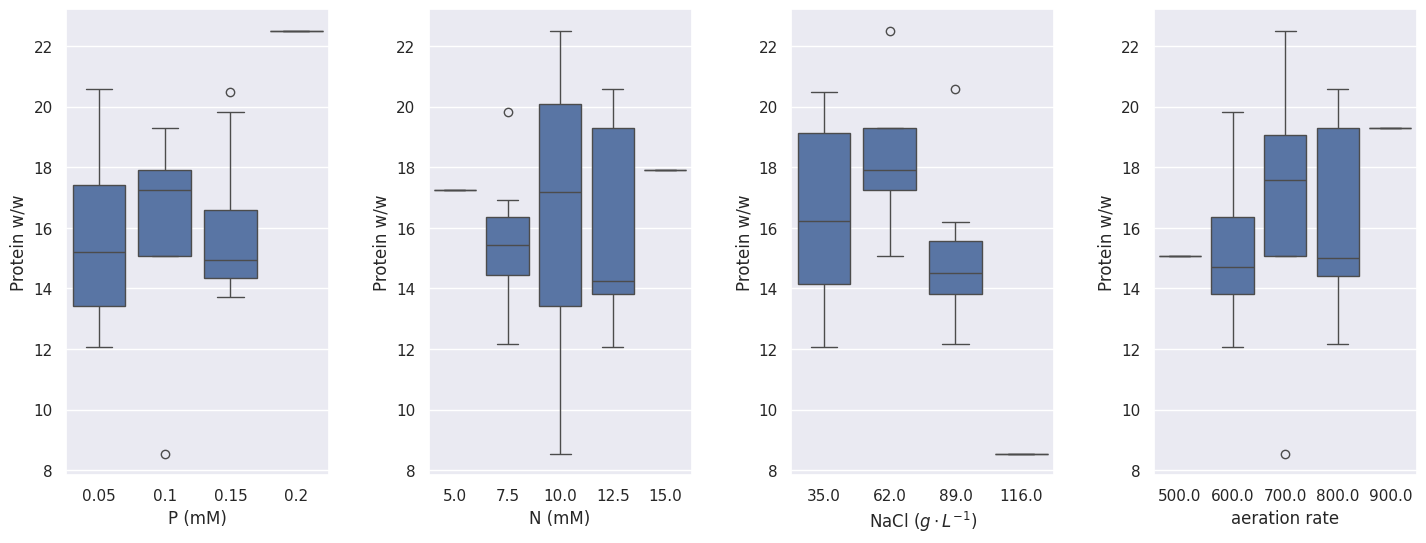

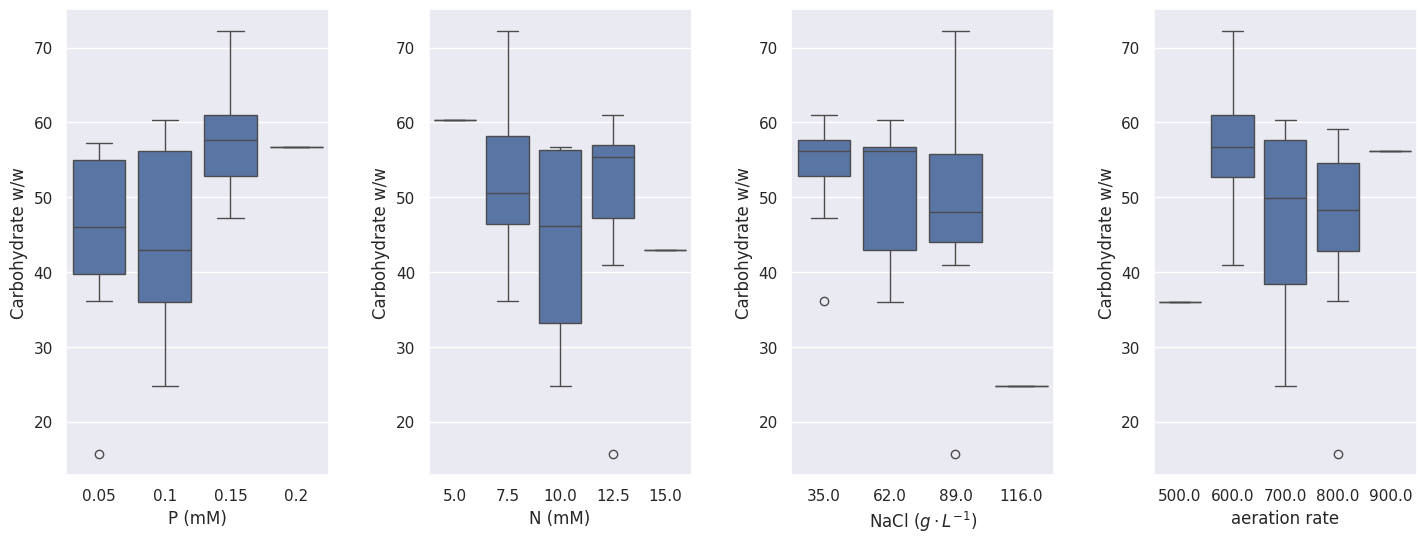

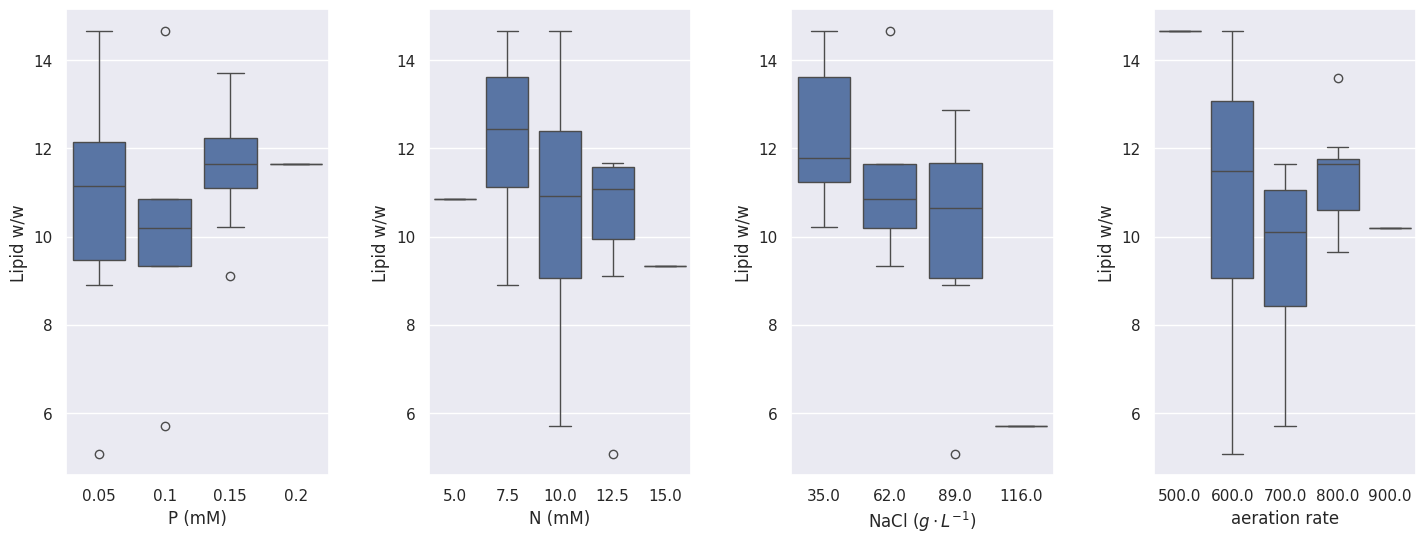

In [4]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Protein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Protein': 'Protein w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Carbohydrate'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Carbohydrate': 'Carbohydrate w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Lipid'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'Lipid': 'Lipid w/w'})

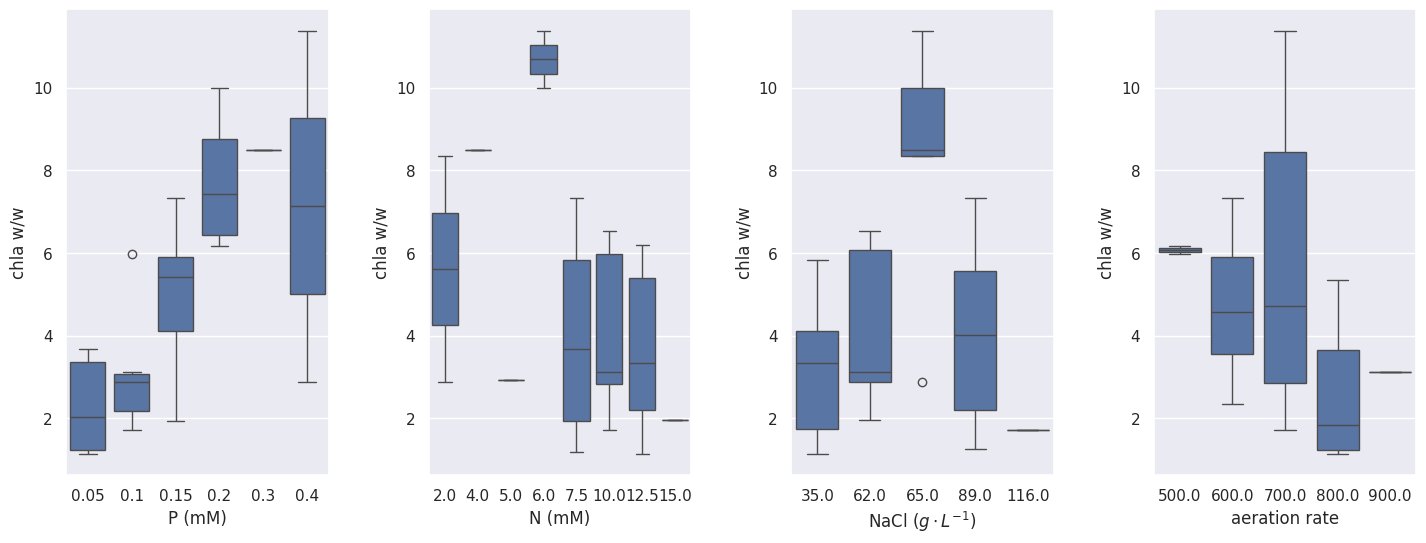

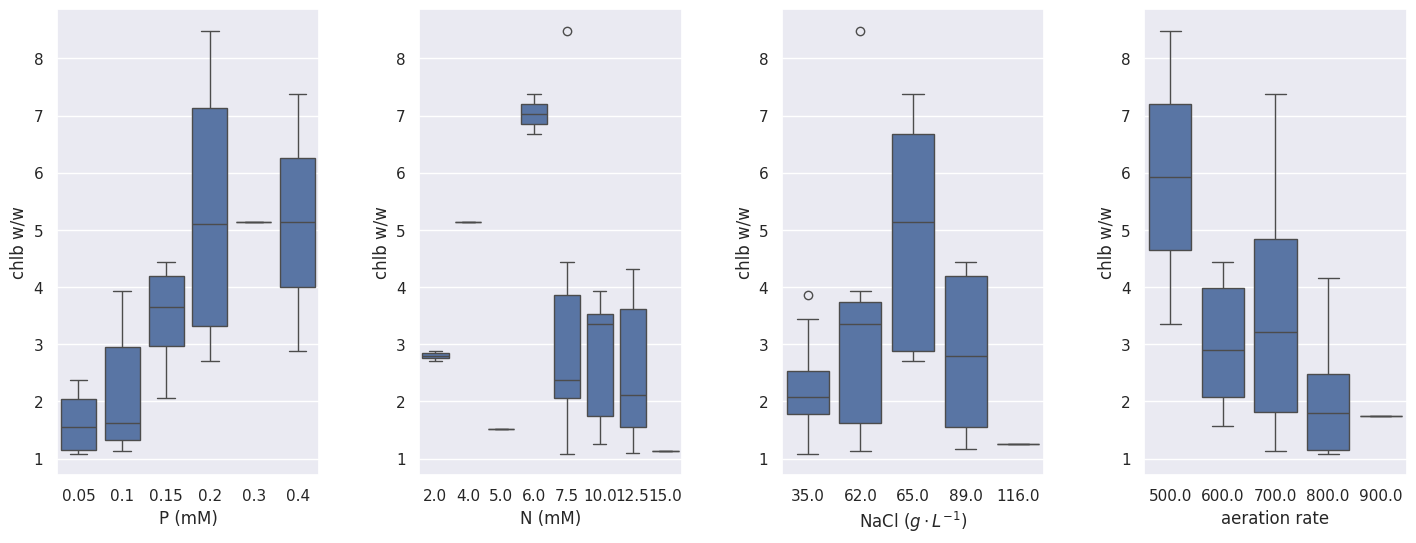

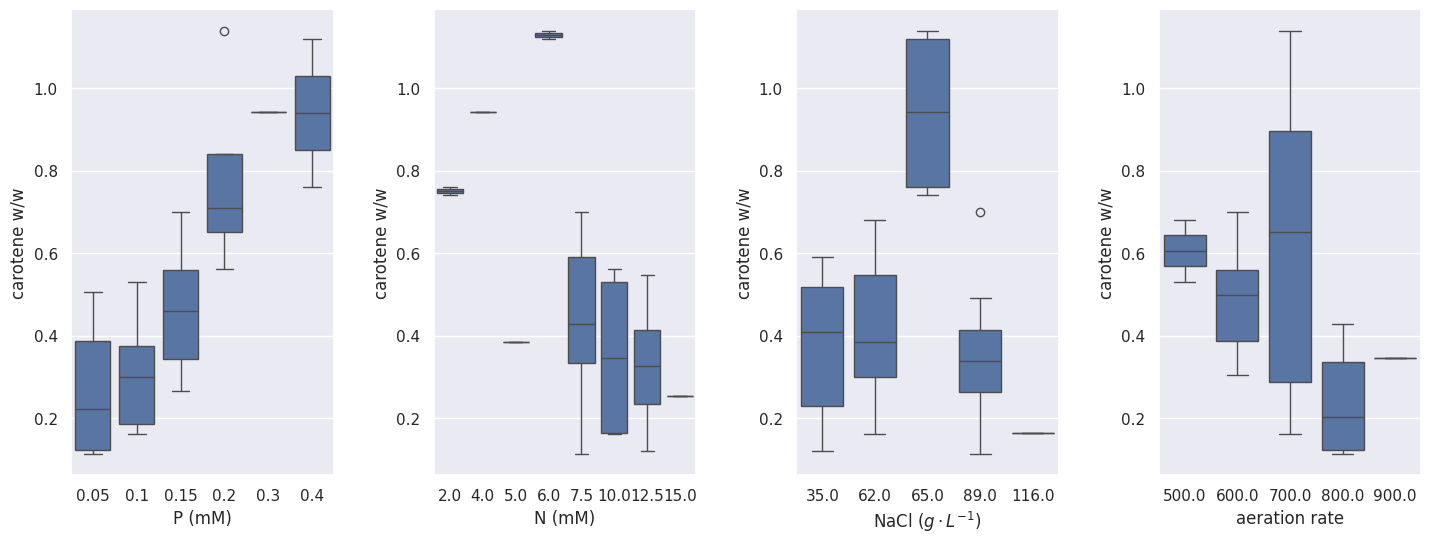

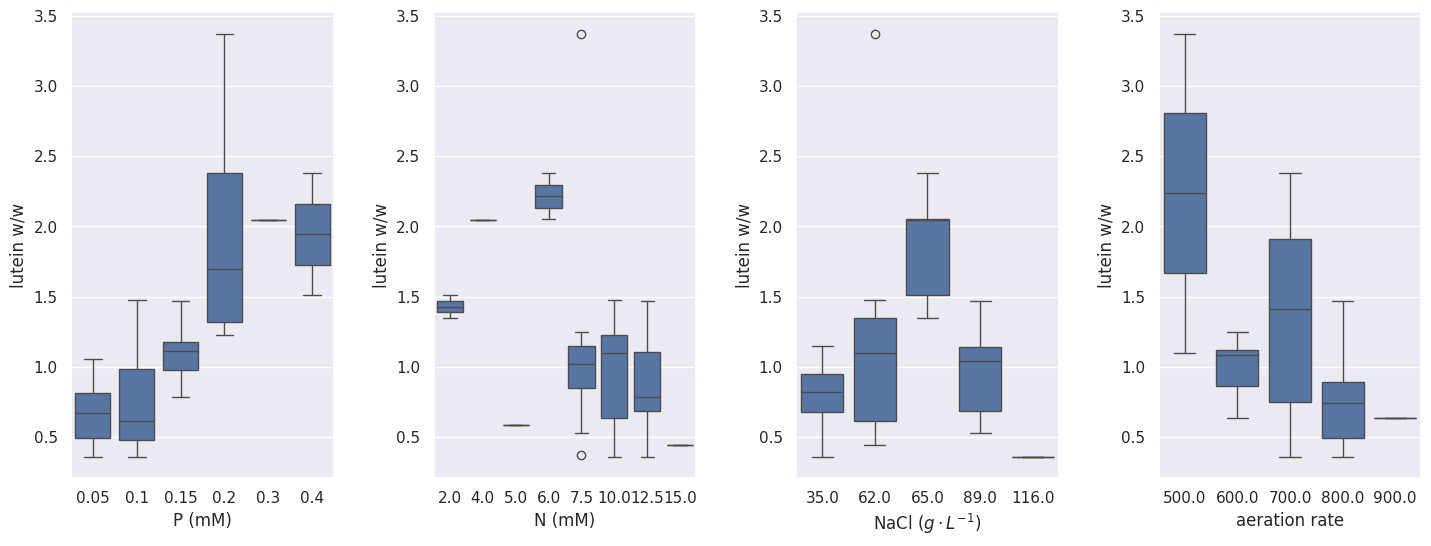

In [5]:
m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)
# m = m.loc[~m.index.str.startswith("N")]
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chla'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chla': 'chla w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chlb'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chlb': 'chlb w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['lutein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'lutein': 'lutein w/w'})

                  biomass ~ P                  
             sum_sq    df          F        PR(>F)
P         5.422548   1.0  54.991238  4.472123e-08
Residual  2.761010  28.0        NaN           NaN 
 ##################################################
            sum_sq    df          F        PR(>F)
P         5.422548   1.0  54.991238  4.472123e-08
Residual  2.761010  28.0        NaN           NaN
                    Pmax ~ P                   
             sum_sq    df          F    PR(>F)
P         0.006762   1.0  27.322194  0.000015
Residual  0.006930  28.0        NaN       NaN 
 ##################################################
            sum_sq    df          F    PR(>F)
P         0.006762   1.0  27.322194  0.000015
Residual  0.006930  28.0        NaN       NaN
                    umax ~ P                   
             sum_sq    df         F   PR(>F)
P         0.000014   1.0  0.033506  0.85608
Residual  0.011971  28.0       NaN      NaN 
 #####################################

/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/gsmmutils/graphics/plot.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[columns])


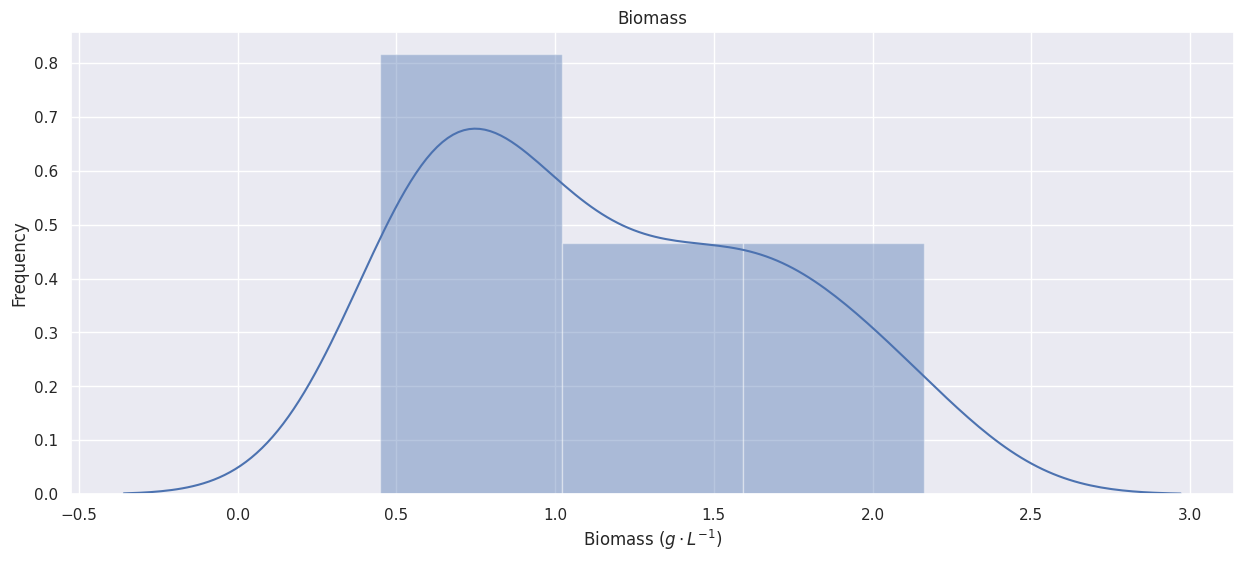

        Pmax
Trial       
1      0.072
2      0.052
3      0.103
4      0.103
5      0.070
6      0.064
7      0.107
8      0.102
9      0.063
10     0.066
11     0.101
12     0.108
13     0.051
14     0.060
15     0.100
16     0.100
17     0.058
18     0.066
20     0.102
22     0.059
23     0.088
24     0.065
PC     0.078
N1     0.107
N2     0.106
N3     0.100
N4     0.112
NC     0.104
TC     0.126
SC     0.095


/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/gsmmutils/graphics/plot.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[columns])


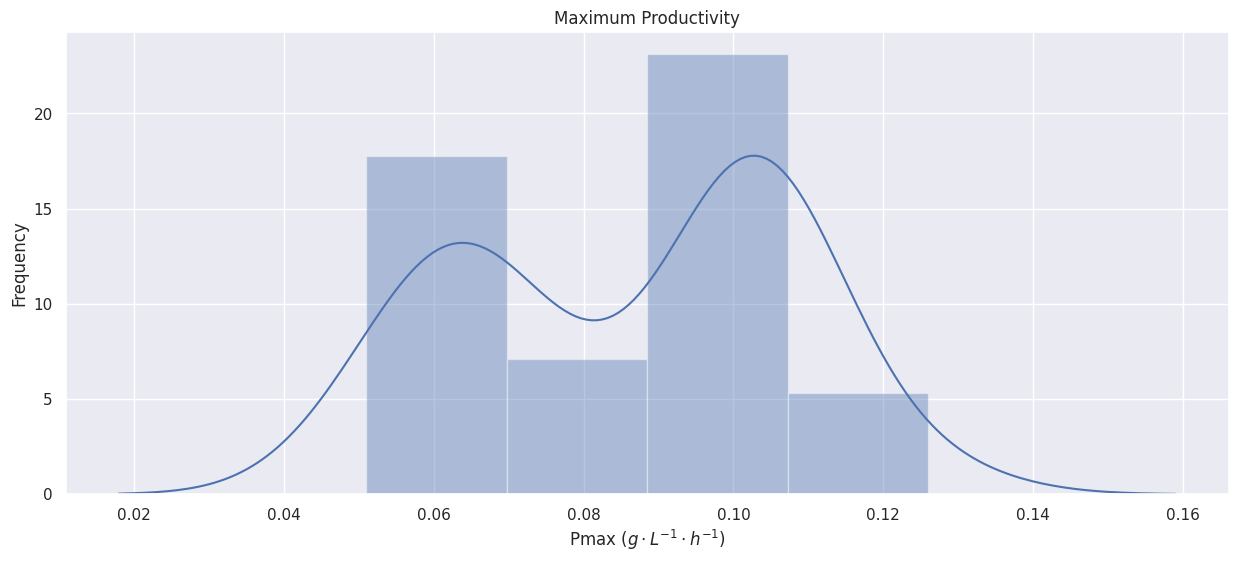

        umax
Trial       
1      0.188
2      0.147
3      0.143
4      0.197
5      0.198
6      0.183
7      0.155
8      0.152
9      0.179
10     0.186
11     0.176
12     0.191
13     0.164
14     0.184
15     0.169
16     0.180
17     0.143
18     0.155
20     0.160
22     0.143
23     0.199
24     0.173
PC     0.180
N1     0.221
N2     0.170
N3     0.192
N4     0.173
NC     0.137
TC     0.176
SC     0.191


/home/ecunha/miniforge3/envs/dfba/lib/python3.8/site-packages/gsmmutils/graphics/plot.py:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[columns])


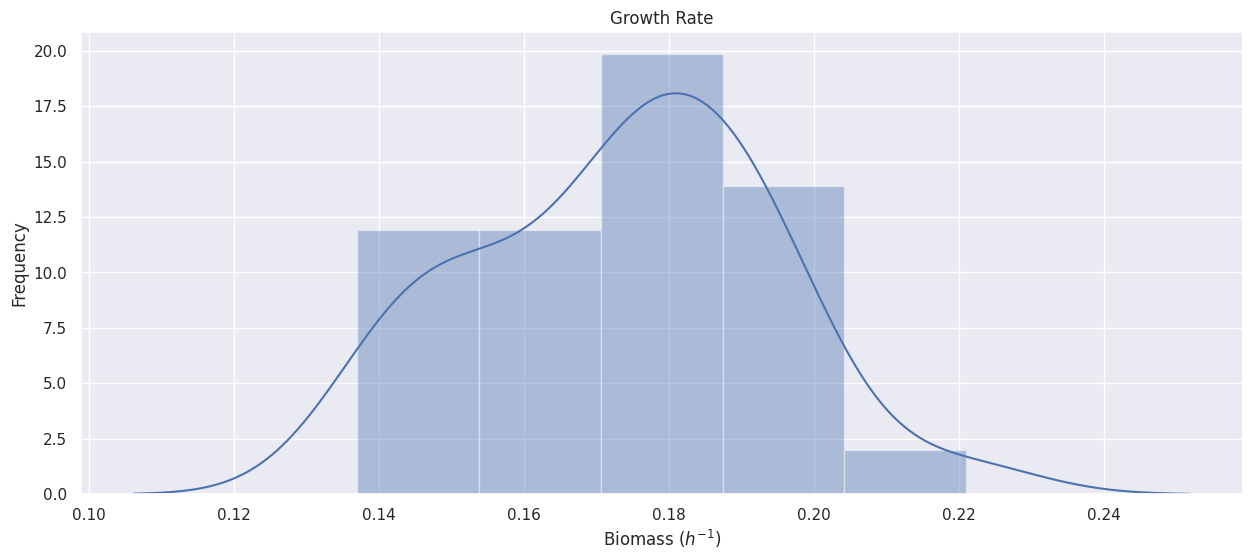

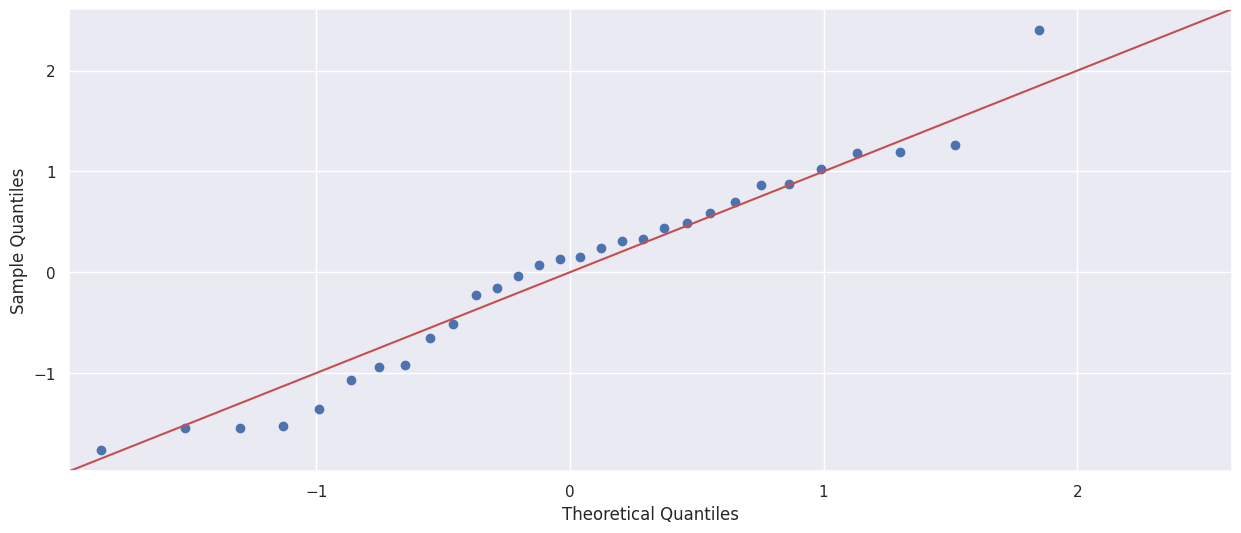

In [8]:
stats = StatisticalAnalysis(matrix.conditions)
anova_table, model = stats.anova('biomass ~ P')
print(anova_table)
anova_table, model = stats.anova('Pmax ~ P')
print(anova_table)
anova_table, model = stats.anova('umax ~ P')
print(anova_table)
hist(matrix.conditions, ['biomass'], title='Biomass', xlabel='Biomass $(g \cdot L^{-1})$', ylabel='Frequency')
hist(matrix.conditions, ['Pmax'], title='Maximum Productivity', xlabel='Pmax $(g \cdot L^{-1} \cdot h^{-1})$', ylabel='Frequency')
hist(matrix.conditions, ['umax'], title='Growth Rate', xlabel='Biomass $(h^{-1})$', ylabel='Frequency')
qqplot(model, to_show=True)

In [44]:
tmp = matrix.conditions.drop([row for row in matrix.conditions.index.tolist() if row.startswith(r"N")])
conditions = ['N', 'P', 'salinity', 'aeration']        # Condition columns
results = ['Pmax', 'biomass', 'umax']  # Result columns

# Correlate only between conditions and results, excluding condition-to-condition correlations
corr_matrix = tmp[conditions + results].corr()

# Filter out the correlations between N and P themselves
filtered_corr = corr_matrix.loc[results, conditions]
print(filtered_corr)

                N         P  salinity  aeration
Pmax    -0.074555  0.879845 -0.128094 -0.280095
biomass -0.137768  0.926338  0.001268 -0.329244
umax     0.153093 -0.193929 -0.203009  0.014733


In [45]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
stats = StatisticalAnalysis(m)
stats.get_correlation().loc[['Protein', "Carbohydrate", "Lipid"], conditions]

,N,P,salinity,aeration
Protein,0.06,0.24,-0.39,0.23
Carbohydrate,-0.21,0.46,-0.35,-0.16
Lipid,-0.34,0.16,-0.56,-0.09


Lipid = -0.05salinity + 14.30
-0.559934492578325


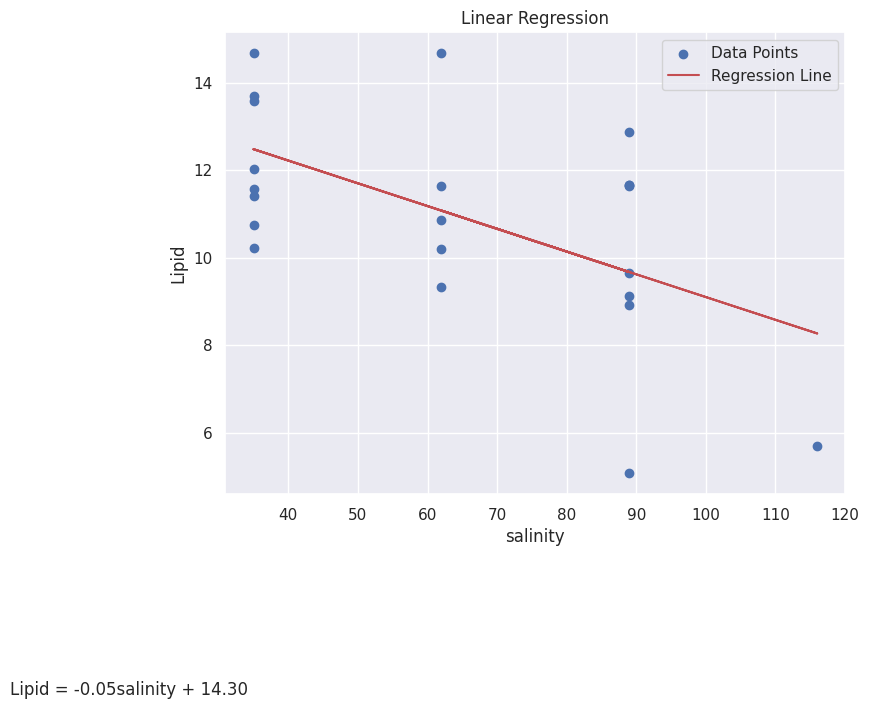

In [47]:
results_dataframe = m
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(results_dataframe['salinity'], results_dataframe['Lipid'])

# Create the regression line equation
equation = f'Lipid = {slope:.2f}salinity + {intercept:.2f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(results_dataframe['salinity'], results_dataframe['Lipid'], label='Data Points')

# Add the regression line to the plot
plt.plot(results_dataframe['salinity'], slope * results_dataframe['salinity'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('salinity')
plt.ylabel('Lipid')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

chlorophyll = 0.032P + 0.003
0.6783950636118288


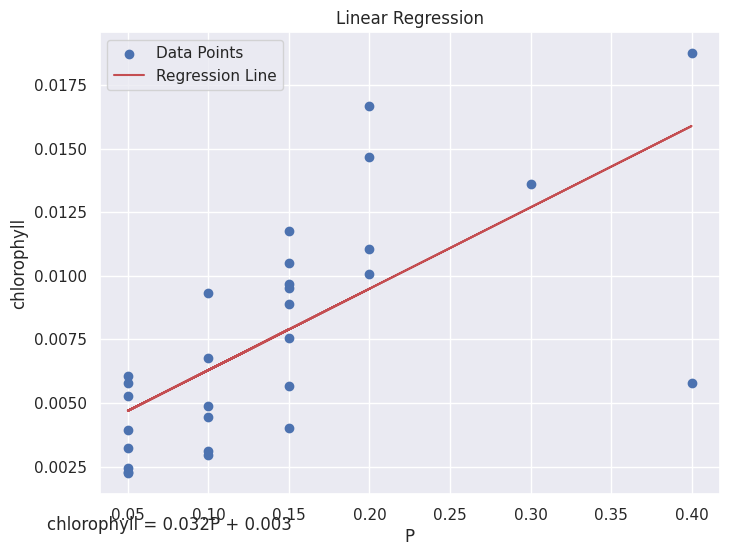

In [48]:
from matplotlib import pyplot as plt
import scipy

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['P'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['P'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('chlorophyll')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

In [64]:
def inhibition_function(x, K, a):
    return (K**a) / (K**a + x**a)
inhibition_function(500, 19, 1) 

0.036608863198458574

Fitted K: 587.2871117070362
Fitted a: 2.4903530320960203


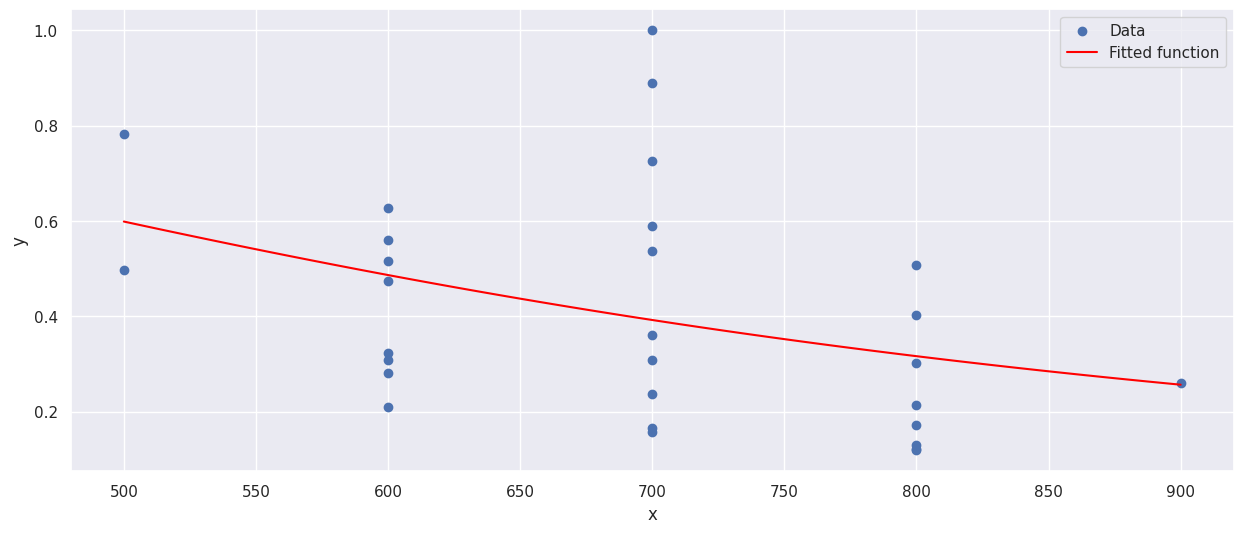

In [68]:
from matplotlib import pyplot as plt
import scipy
from scipy.optimize import curve_fit
import numpy as np
def inhibition_function(x, K, a):
    return (K**a) / (K**a + x**a)

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

temp_results = m.copy()
temp_results['chlorophyll'] = (temp_results['chla'] + temp_results['chlb'])/1000

maximum = temp_results['chlorophyll'].max()

y_data = temp_results['chlorophyll'] /maximum
 
# Perform nonlinear curve fitting
popt, pcov = curve_fit(inhibition_function, temp_results['aeration'], y_data, p0=[500, 10])

# Extract the fitted parameters
K_fitted, a_fitted = popt
print(f"Fitted K: {K_fitted}")
print(f"Fitted a: {a_fitted}")

# Generate points for plotting the fitted curve
x_fit = np.linspace(min(temp_results['aeration']), max(temp_results['aeration']), 100)
y_fit = inhibition_function(x_fit, *popt)

# Plot the data and the fitted curve
plt.scatter(temp_results['aeration'], y_data, label='Data')
plt.plot(x_fit, y_fit, label='Fitted function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



chlorophyll = 2.334P + 0.138
0.7802949272780945


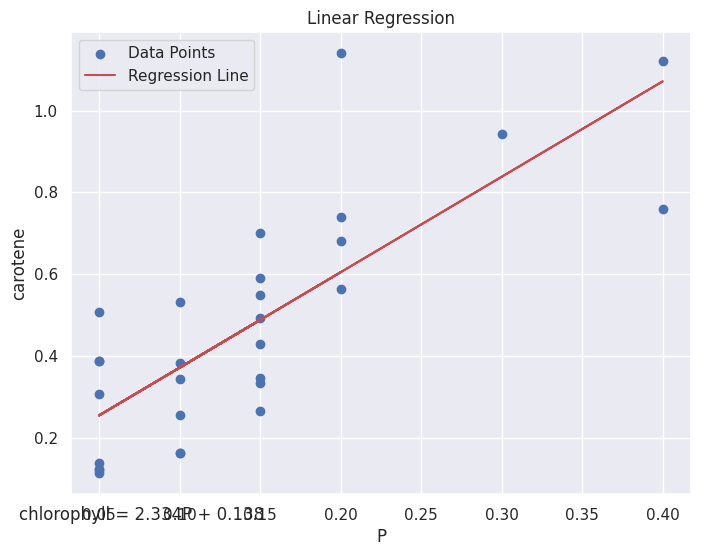

In [49]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(m['P'], m['carotene'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(m['P'], m['carotene'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('carotene')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

chlorophyll = 0.276P + 0.389
0.19199073108542164


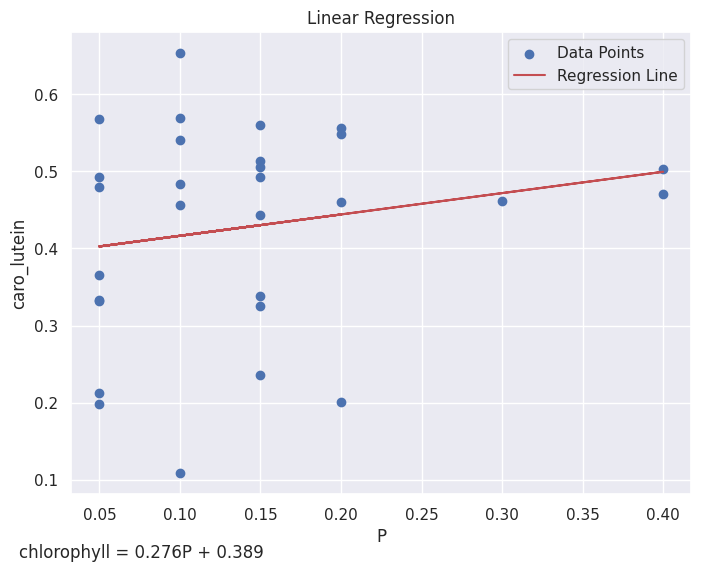

In [51]:
m['caro_lutein'] = m['carotene']/m['lutein']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(m['P'], m['caro_lutein'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(m['P'], m['caro_lutein'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('P')
plt.ylabel('caro_lutein')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

In [52]:
if any(row.startswith("N") for row in m.index.tolist()):
    m = m.drop([row for row in m.index.tolist() if row.startswith(r"N")])
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()
results = ['lutein', "carotene", "chla", "chlb"]
print(cor.loc[results, conditions])

stats.anova('P ~ chla')
stats.anova('N ~ chla')
stats.anova('salinity ~ chla')
stats.anova('aeration ~ chla')

stats.anova('P ~ chlb')
stats.anova('N ~ chlb')
stats.anova('salinity ~ chlb')
stats.anova('aeration ~ chlb')

stats.anova('P ~ carotene')
stats.anova('N ~ carotene')
stats.anova('salinity ~ carotene')
stats.anova('aeration ~ carotene')

stats.anova('P ~ lutein')
stats.anova('N ~ lutein')
stats.anova('salinity ~ lutein')
stats.anova('aeration ~ lutein')

stats.anova('P ~ caro_lutein')
stats.anova('N ~ caro_lutein')
stats.anova('salinity ~ caro_lutein')
stats.anova('aeration ~ caro_lutein')

stats.manova('salinity + aeration ~ carotene')
stats.manova('P + salinity ~ carotene')
stats.manova('N + salinity ~ carotene')
stats.manova('N + P ~ carotene')

             N     P  salinity  aeration
lutein   -0.19  0.61      0.02     -0.49
carotene -0.27  0.63     -0.15     -0.67
chla     -0.10  0.72      0.05     -0.57
chlb     -0.16  0.72      0.05     -0.53
                    P ~ chla                   
             sum_sq    df          F   PR(>F)
chla      0.029999   1.0  23.291835  0.00008
Residual  0.028335  22.0        NaN      NaN 
 ##################################################
                    N ~ chla                   
               sum_sq    df         F    PR(>F)
chla        1.579534   1.0  0.225048  0.639895
Residual  154.410050  22.0       NaN       NaN 
 ##################################################
                salinity ~ chla                
                 sum_sq    df         F    PR(>F)
chla         43.693646   1.0  0.066686  0.798626
Residual  14414.806354  22.0       NaN       NaN 
 ##################################################
                aeration ~ chla                
                  